In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [4]:
fashion = datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [5]:
type(train_images)

numpy.ndarray

In [6]:
type(train_labels)

numpy.ndarray

In [7]:
print(len(train_images))

60000


In [8]:
print(len(train_labels))

60000


In [9]:
print(train_images[0].shape)

(28, 28)


In [10]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

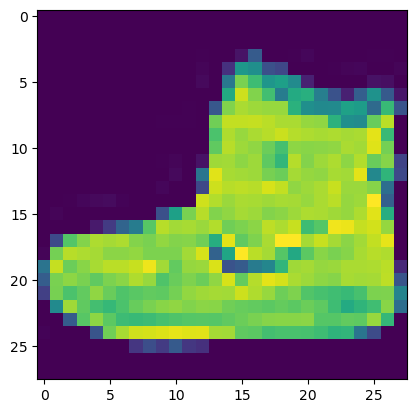

In [13]:
plt.imshow(train_images[0])
plt.show()

In [14]:
print(train_labels[0])


9


In [15]:
#Normalizing the pixel values to between 0 and 1
train_images,test_images = train_images/255.0,test_images/255.0


In [16]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [17]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [19]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [21]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 48s 24ms/step - loss: 0.4896 - accuracy: 0.8216 - val_loss: 0.3620 - val_accuracy: 0.8709
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3182 - accuracy: 0.8834 - val_loss: 0.3093 - val_accuracy: 0.8871
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2712 - accuracy: 0.8995 - val_loss: 0.2857 - val_accuracy: 0.8956
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2407 - accuracy: 0.9103 - val_loss: 0.2633 - val_accuracy: 0.9017
Epoch 5/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2177 - accuracy: 0.9196 - val_loss: 0.2747 - val_accuracy: 0.9024


In [22]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.2747 - accuracy: 0.9024 - 3s/epoch - 9ms/step
0.902400016784668


Text(0.5, 0, 'Epoch')

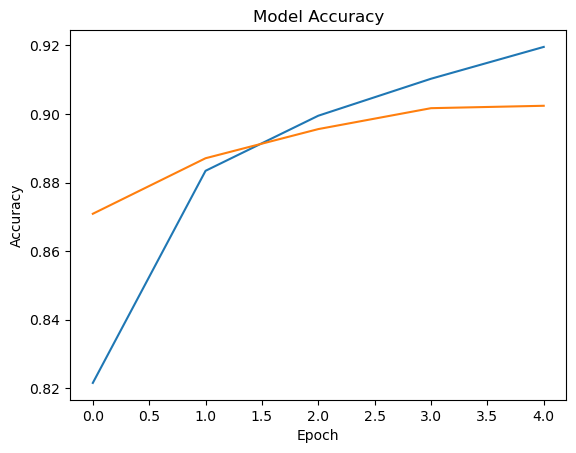

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
